In [1]:
%matplotlib inline
from openTSNE import TSNE
from openTSNE.callbacks import ErrorLogger
import numpy as np
import torch
from matplotlib import pyplot as plt
from matplotlib.patches import Patch

from samplednn.mnistloader import setup_mnist_loader

In [2]:
mnist_test = setup_mnist_loader(train=True)

In [3]:
bayes = np.load('models/bayesian/predictions/mnist_train_train/mnist_train_ep004.npy')

In [16]:
bayes_subset = bayes[::20,::5]
bayes_subset_flat = np.concatenate(bayes_subset)

In [12]:
tsne = TSNE(
    n_components=2,
    perplexity=100,
    n_jobs=4,
    metric='euclidean',
    callbacks=ErrorLogger(),
    random_state=42
)

In [21]:
averages_hd = bayes_subset.mean(axis=1)

In [44]:
%%time
bayes_subset_projected = tsne.fit(with_averages)

D:\Dokumente\Dissertation\Code\python\samplednn\env\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "env\lib\site-packages\pynndescent\pynndescent_.py", line 38:
    @numba.njit(parallel=True, fastmath=True)
    def init_from_random(n_neighbors, data, query_points, heap, rng_state):
    ^

  self.func_ir.loc))
D:\Dokumente\Dissertation\Code\python\samplednn\env\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "env\lib\site-packages\pynndescent\p

Iteration   50, KL divergence  5.9560, 50 iterations in 9.6209 sec
Iteration  100, KL divergence  5.6501, 50 iterations in 9.3975 sec
Iteration  150, KL divergence  5.6188, 50 iterations in 9.1217 sec
Iteration  200, KL divergence  5.6124, 50 iterations in 9.2547 sec
Iteration  250, KL divergence  5.6122, 50 iterations in 9.1678 sec
Iteration   50, KL divergence  3.9948, 50 iterations in 9.3122 sec
Iteration  100, KL divergence  3.7191, 50 iterations in 9.3422 sec
Iteration  150, KL divergence  3.5658, 50 iterations in 9.3691 sec
Iteration  200, KL divergence  3.4609, 50 iterations in 9.3905 sec
Iteration  250, KL divergence  3.3828, 50 iterations in 9.3850 sec
Iteration  300, KL divergence  3.3214, 50 iterations in 9.3731 sec
Iteration  350, KL divergence  3.2715, 50 iterations in 9.4814 sec
Iteration  400, KL divergence  3.2299, 50 iterations in 9.8465 sec
Iteration  450, KL divergence  3.1948, 50 iterations in 10.3390 sec
Iteration  500, KL divergence  3.1647, 50 iterations in 10.83

In [50]:
projection_without_averages = bayes_subset_projected[:-averages_hd.shape[0]]
projected_averages = bayes_subset_projected[-averages_hd.shape[0]:]

In [43]:
with_averages = np.concatenate([bayes_subset_flat,averages_hd])

In [55]:
averages_ld = np.array(projection_without_averages.reshape(-1,bayes_subset.shape[1],2)).mean(axis=1)

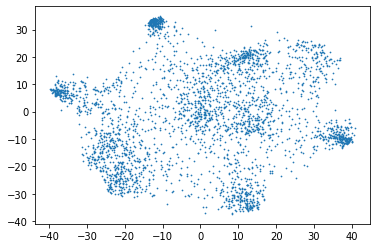

In [59]:
plt.scatter(averages_ld[:,0],averages_ld[:,1],s=0.5)

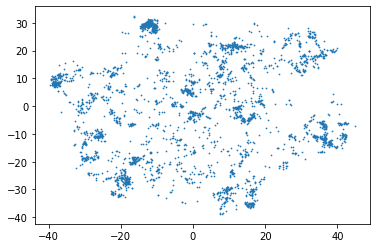

In [61]:
plt.scatter(projected_averages[:,0],projected_averages[:,1],s=0.5)

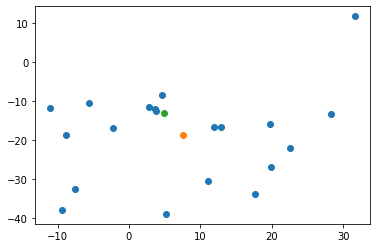

In [78]:
baz = 100

foo = np.array(projection_without_averages.reshape(-1,bayes_subset.shape[1],2))[baz]
foo1 = averages_ld[baz]
foo2 = projected_averages[baz]

plt.scatter(foo[:,0], foo[:,1])
plt.scatter(*foo1)
plt.scatter(*foo2)